In [2]:
# 2023-24 HORNETS GAME LOG

from nba_api.stats.endpoints import (
    teamgamelog,
)  # Import the teamgamelog endpoint from the NBA API package
from tabulate import (
    tabulate,
)  # Import the tabulate package to print the data in a table

# define the team ID of the Charlotte Hornets
team_id = "1610612766"
season = "2023-24"  # Define the season
team_gamelog = teamgamelog.TeamGameLog(
    team_id=team_id, season=season
)  # Fetch game log for the specified team and season

game_log = team_gamelog.get_data_frames()[
    0
]  # Get a DataFrame containing Charlotte Hornets' game log

# remove Team_ID column
game_log = game_log.drop(columns=["Team_ID"])
game_log = game_log.drop(columns=["MIN"])

print(tabulate(game_log, tablefmt="fancy_grid"))

# save the latest gameID to a variable
gameID = game_log.iloc[0, 0]

╒════╤════════════╤══════════════╤═════════════╤═══╤═══╤════╤═══════╤════╤═════╤═══════╤════╤════╤═══════╤════╤════╤═══════╤════╤════╤════╤════╤════╤════╤════╤════╤═════╕
│  0 │ 0022300057 │ NOV 28, 2023 │ CHA @ NYK   │ L │ 5 │ 11 │ 0.313 │ 37 │  89 │ 0.416 │ 13 │ 31 │ 0.419 │  4 │  7 │ 0.571 │ 13 │ 28 │ 41 │ 21 │  8 │  2 │ 17 │ 14 │  91 │
├────┼────────────┼──────────────┼─────────────┼───┼───┼────┼───────┼────┼─────┼───────┼────┼────┼───────┼────┼────┼───────┼────┼────┼────┼────┼────┼────┼────┼────┼─────┤
│  1 │ 0022300248 │ NOV 26, 2023 │ CHA @ ORL   │ L │ 5 │ 10 │ 0.333 │ 44 │  83 │ 0.53  │ 13 │ 30 │ 0.433 │ 16 │ 25 │ 0.64  │  5 │ 31 │ 36 │ 27 │  6 │  7 │ 18 │ 26 │ 117 │
├────┼────────────┼──────────────┼─────────────┼───┼───┼────┼───────┼────┼─────┼───────┼────┼────┼───────┼────┼────┼───────┼────┼────┼────┼────┼────┼────┼────┼────┼─────┤
│  2 │ 0022300225 │ NOV 22, 2023 │ CHA vs. WAS │ W │ 5 │  9 │ 0.357 │ 43 │  91 │ 0.473 │ 16 │ 37 │ 0.432 │ 15 │ 21 │ 0.714 │ 11 │ 38 │ 49 │ 27 │ 

In [3]:
from nba_api.stats.endpoints import gamerotation
from tabulate import tabulate
from pandas import DataFrame
from datetime import datetime
from nba_api.stats.endpoints import scoreboardv2
from nba_api.stats.library.parameters import GameDate
from nba_api.stats.endpoints import teamgamelog

# charlotte hornets team id
hornets = "1610612766"

# enter info
season = "2023-24"
my_game_id = gameID


# find the date for a given game id from team game logs
gamelog = teamgamelog.TeamGameLog(team_id=hornets, season=season)
gamelog_df = gamelog.get_data_frames()[0]
game_date = gamelog_df[gamelog_df["Game_ID"] == my_game_id]["GAME_DATE"].values[0]

# Define the input and output formats
input_format = "%b %d, %Y"
output_format = "%Y%m%d"

# Define the input date string
date_string = game_date

# Parse the input date string into a datetime object
date_object = datetime.strptime(date_string, input_format)

# Convert the datetime object back to a string in the desired output format
converted_date = date_object.strftime(output_format)

# Parse the input date string into a datetime object
date_object = datetime.strptime(converted_date, "%Y%m%d")

# Get the formatted date string for the API request
this_game_date = GameDate().get_date(
    date_object.year, date_object.month, date_object.day
)

# get the results of all games on a given date
scoreboard = scoreboardv2.ScoreboardV2(game_date=this_game_date)

# get the line scores for all games on a given date
line_score = scoreboard.line_score.get_data_frame()

# only show games with GAME_ID that matches the input my_game_id
line_score = line_score[line_score["GAME_ID"] == my_game_id]

# only show columns TEAM_NAME, PTS, PTS_QTR1, PTS_QTR2, PTS_QTR3, PTS_QTR4, PTS_OT1, PTS_OT2, PTS_OT3, PTS_OT4, PTS_OT5, PTS_OT6, PTS_OT7, PTS_OT8, PTS_OT9, PTS_OT10
line_score = line_score[
    [
        "TEAM_NAME",
        "PTS",
        "PTS_QTR1",
        "PTS_QTR2",
        "PTS_QTR3",
        "PTS_QTR4",
        "PTS_OT1",
        "PTS_OT2",
        "PTS_OT3",
        "PTS_OT4",
    ]
]
home_team_name = line_score["TEAM_NAME"].values[1]
away_team_name = line_score["TEAM_NAME"].values[0]

# show it
score_table = tabulate(line_score, headers="keys", tablefmt="psql")
print(score_table)

+----+-------------+-------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+
|    | TEAM_NAME   |   PTS |   PTS_QTR1 |   PTS_QTR2 |   PTS_QTR3 |   PTS_QTR4 |   PTS_OT1 |   PTS_OT2 |   PTS_OT3 |   PTS_OT4 |
|----+-------------+-------+------------+------------+------------+------------+-----------+-----------+-----------+-----------|
|  8 | Hornets     |    91 |         16 |         28 |         22 |         25 |         0 |         0 |         0 |         0 |
|  9 | Knicks      |   115 |         29 |         24 |         27 |         35 |         0 |         0 |         0 |         0 |
+----+-------------+-------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+


In [4]:
# Get the game rotation data for a game
game_rotation = gamerotation.GameRotation(game_id=my_game_id)
# Get the home team data
home_team = game_rotation.home_team
# Get the away team data
away_team = game_rotation.away_team

# convert to dataframe
home_team = home_team.get_data_frame()
away_team = away_team.get_data_frame()

# Print the home team data
print(tabulate(home_team, headers="keys", tablefmt="psql"))
# Print the away team data
print(tabulate(away_team, headers="keys", tablefmt="psql"))

# save home team to csv
home_team.to_csv("home_team.csv", index=False)
# save away team to csv
away_team.to_csv("away_team.csv", index=False)

+----+------------+------------+-------------+-------------+-------------+----------------+---------------+----------------+-----------------+--------------+-----------+-----------+
|    |    GAME_ID |    TEAM_ID | TEAM_CITY   | TEAM_NAME   |   PERSON_ID | PLAYER_FIRST   | PLAYER_LAST   |   IN_TIME_REAL |   OUT_TIME_REAL |   PLAYER_PTS |   PT_DIFF |   USG_PCT |
|----+------------+------------+-------------+-------------+-------------+----------------+---------------+----------------+-----------------+--------------+-----------+-----------|
|  0 | 0022300057 | 1610612752 | New York    | Knicks      |      203944 | Julius         | Randle        |              0 |            6600 |           11 |        16 |     0.32  |
|  1 | 0022300057 | 1610612752 | New York    | Knicks      |      203944 | Julius         | Randle        |          10490 |           21600 |           12 |         2 |     0.302 |
|  2 | 0022300057 | 1610612752 | New York    | Knicks      |      203944 | Julius         

In [5]:
# DATA FOR MARGIN TIMELINE
# get play by play data from my_game_id
from nba_api.stats.endpoints import playbyplayv2

playbyplay = playbyplayv2.PlayByPlayV2(game_id=my_game_id)
playbyplay_df = playbyplay.get_data_frames()[0]

# only show columns PCTIMESTRING, MARGIN
playbyplay_df = playbyplay_df[["PERIOD", "PCTIMESTRING", "SCOREMARGIN"]]

print(tabulate(playbyplay_df, headers="keys", tablefmt="psql"))

# save to csv
playbyplay_df.to_csv("playbyplay.csv")

+-----+----------+----------------+---------------+
|     |   PERIOD | PCTIMESTRING   |   SCOREMARGIN |
|-----+----------+----------------+---------------|
|   0 |        1 | 12:00          |               |
|   1 |        1 | 12:00          |               |
|   2 |        1 | 11:41          |               |
|   3 |        1 | 11:41          |             1 |
|   4 |        1 | 11:41          |             2 |
|   5 |        1 | 11:24          |               |
|   6 |        1 | 11:22          |               |
|   7 |        1 | 11:14          |             5 |
|   8 |        1 | 10:57          |               |
|   9 |        1 | 10:55          |               |
|  10 |        1 | 10:50          |               |
|  11 |        1 | 10:48          |               |
|  12 |        1 | 10:41          |             3 |
|  13 |        1 | 10:23          |               |
|  14 |        1 | 10:21          |               |
|  15 |        1 | 10:06          |               |
|  16 |     

/var/folders/sn/2tcyhlx96pggv_hgs9h8mn8h0000gn/T/ipykernel_97890/887147726.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdYlGn")


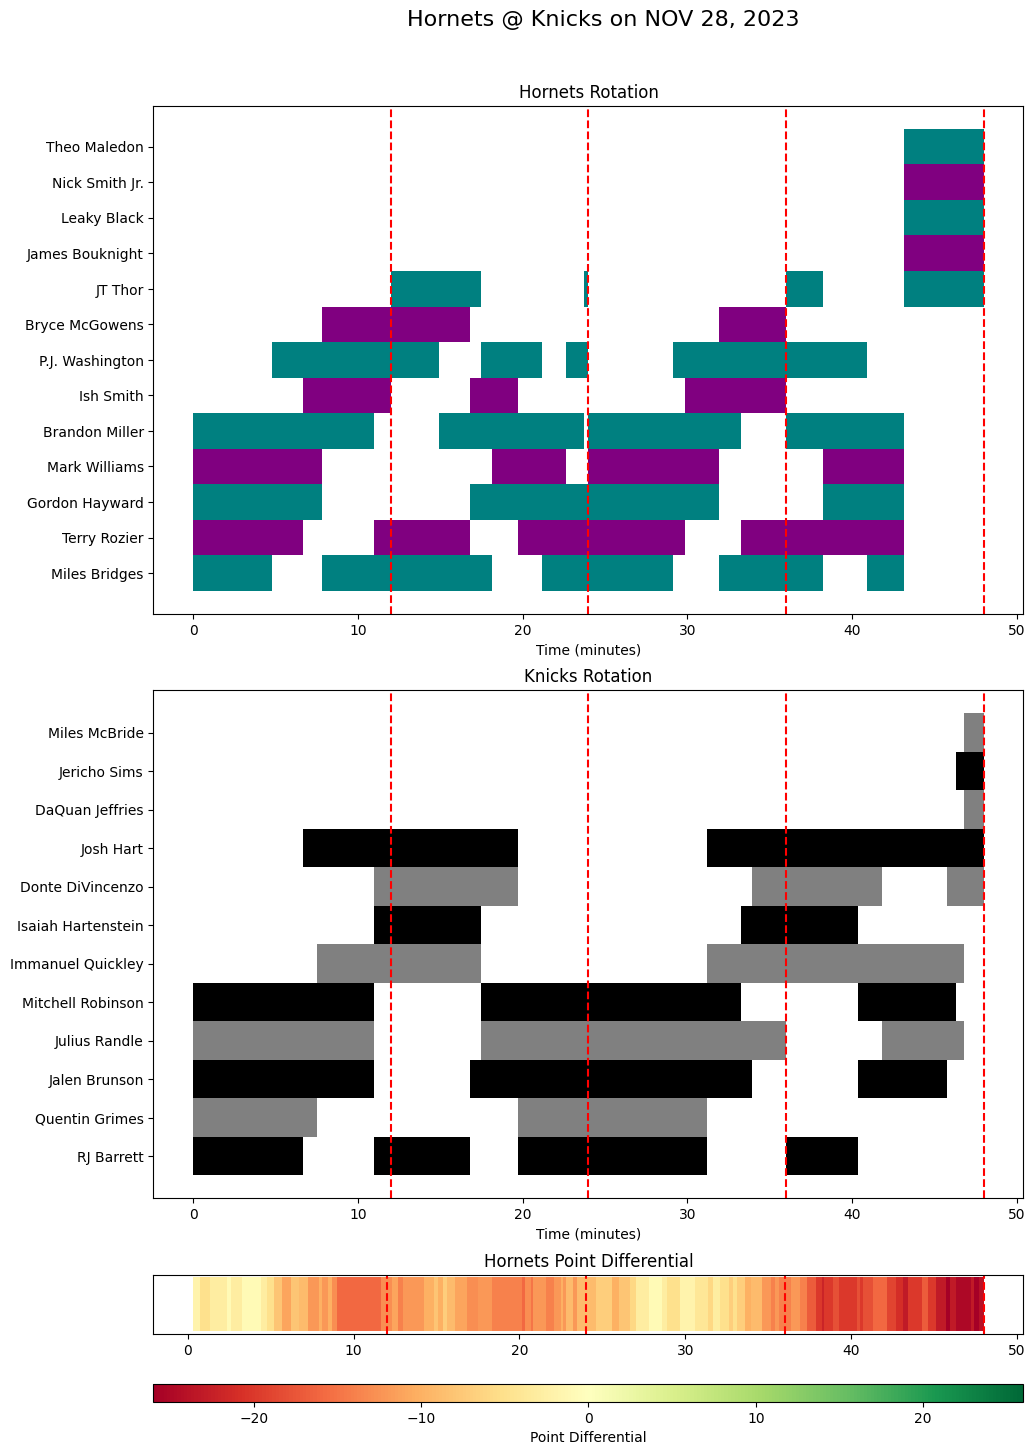

In [6]:
# GRAPHING TIME
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import TwoSlopeNorm

# Import the necessary modules
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Convert SCOREMARGIN to numeric type
playbyplay_df["SCOREMARGIN"] = pd.to_numeric(
    playbyplay_df["SCOREMARGIN"], errors="coerce"
)
playbyplay_df["SCOREMARGIN"].ffill(inplace=True)

# if Charlotte Hornets are the away team then invert the SCOREMARGIN
if away_team_name == "Hornets":
    playbyplay_df["SCOREMARGIN"] = -playbyplay_df["SCOREMARGIN"]

# Create a colormap for the point differential using matplotlib.colormaps[name]
cmap = cm.get_cmap("RdYlGn")
vmin = -max(
    abs(playbyplay_df["SCOREMARGIN"].min()), abs(playbyplay_df["SCOREMARGIN"].max())
)
vmax = max(
    abs(playbyplay_df["SCOREMARGIN"].min()), abs(playbyplay_df["SCOREMARGIN"].max())
)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Load the data
away_team_df = away_team
home_team_df = home_team
playbyplay_df = playbyplay_df

# Add a new column for full player name and convert time from tenths of a second to minutes
for df in [away_team_df, home_team_df]:
    df["PLAYER"] = df["PLAYER_FIRST"] + " " + df["PLAYER_LAST"]
    df["IN_TIME_MIN"] = df["IN_TIME_REAL"] / 600
    df["OUT_TIME_MIN"] = df["OUT_TIME_REAL"] / 600

# Convert PCTIMESTRING to decimal minutes and calculate total game time
playbyplay_df["MINUTES_REMAINING"] = playbyplay_df["PCTIMESTRING"].apply(
    lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60
)
playbyplay_df["TIME"] = (playbyplay_df["PERIOD"] - 1) * 12 + (
    12 - playbyplay_df["MINUTES_REMAINING"]
)

# Create a new plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(12, 16), gridspec_kw={"height_ratios": [4, 4, 1]}
)

# Define the colors to alternate between
if away_team_name == "Hornets":
    away_colors = ["teal", "purple"]
else:
    away_colors = ["black", "gray"]
if home_team_name == "Hornets":
    home_colors = ["teal", "purple"]
else:
    home_colors = ["black", "gray"]

# Sort the away team dataframe by IN_TIME_MIN and PLAYER columns
away_team_df = away_team_df.sort_values(by=["OUT_TIME_MIN", "PLAYER"])

# Sort the home team dataframe by IN_TIME_MIN and PLAYER columns
home_team_df = home_team_df.sort_values(by=["OUT_TIME_MIN", "PLAYER"])

# Plot the player presence for the away team
color_index = 0
for i, player in enumerate(away_team_df["PLAYER"].unique()):
    player_data = away_team_df[away_team_df["PLAYER"] == player]
    y = i + 0.5  # Adjust y to center the player name with the bar
    for _, row in player_data.iterrows():
        facecolor = away_colors[color_index % len(away_colors)]
        ax1.broken_barh(
            [(row["IN_TIME_MIN"], row["OUT_TIME_MIN"] - row["IN_TIME_MIN"])],
            (y - 1, 1),
            facecolors=facecolor,
            label=player,
        )
    color_index += 1

# Plot the player presence for the home team
color_index = 0
for i, player in enumerate(
    home_team_df["PLAYER"].unique(), start=len(away_team_df["PLAYER"].unique())
):
    player_data = home_team_df[home_team_df["PLAYER"] == player]
    y = (
        i - len(away_team_df["PLAYER"].unique()) + 0.5
    )  # Adjust y to center the player name with the bar
    for _, row in player_data.iterrows():
        facecolor = home_colors[color_index % len(home_colors)]
        ax2.broken_barh(
            [(row["IN_TIME_MIN"], row["OUT_TIME_MIN"] - row["IN_TIME_MIN"])],
            (y - 1, 1),
            facecolors=facecolor,
            label=player,
        )
    color_index += 1

# Plot the point differential from playbyplay data
for i in range(len(playbyplay_df) - 1):
    row1, row2 = playbyplay_df.iloc[i], playbyplay_df.iloc[i + 1]
    if not pd.isna(row1["SCOREMARGIN"]):
        ax3.broken_barh(
            [(row1["TIME"], row2["TIME"] - row1["TIME"])],
            (0, 1),
            facecolors=cmap(norm(row1["SCOREMARGIN"])),
        )


# Add vertical lines to indicate the end of each quarter
quarter_boundaries = [12, 24, 36, 48]
for boundary in quarter_boundaries:
    ax1.axvline(x=boundary, color="r", linestyle="--")
    ax2.axvline(x=boundary, color="r", linestyle="--")
    ax3.axvline(x=boundary, color="r", linestyle="--")

# Set labels and title for the away team player presence plot
ax1.set_xlabel("Time (minutes)")
ax1.set_yticks(range(len(away_team_df["PLAYER"].unique())))
ax1.set_yticklabels(away_team_df["PLAYER"].unique())
ax1.set_title(away_team_name + " Rotation")

# Set labels and title for the home team player presence plot
ax2.set_xlabel("Time (minutes)")
ax2.set_yticks(range(len(home_team_df["PLAYER"].unique())))
ax2.set_yticklabels(home_team_df["PLAYER"].unique())
ax2.set_title(home_team_name + " Rotation")

# Set labels for the point differential plot
ax3.set_yticks([])
ax3.set_title("Hornets Point Differential")

# Move the colorbar to the bottom of the graph
divider = make_axes_locatable(ax3)
cax = divider.append_axes("bottom", size="30%", pad=0.5)
cb = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation="horizontal"
)
cb.set_label("Point Differential")

# Add a colorbar to explain the point differential colors
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
# cb.set_label("Point Differential")

# Add a title to the graph
plt.suptitle(away_team_name + " @ " + home_team_name + " on " + game_date, fontsize=16)

# move the title down a bit
plt.subplots_adjust(top=0.92)

# Add padding to the right side of the graph
plt.subplots_adjust(right=0.85)

plt.show()